# PROJECT OWNER

TUYEN NGUYEN

@: tuyen.bs19bds001@spjain.org

Phone: (+61)48-016-2923

# GENERAL INTRODUCTION

This project is another simple approach, which helps reduce the complexity leading to expensive costs in quick red wine quality prediction using 11 characteristics: 

(1) fixed acidity,

(2) volatile acidity,

(3) citric acid,

(4) residual sugar,

(5) chlorides,

(6) free sulfur dioxide,

(7) total sulfur dioxide,

(8) density,

(9) pH,

(10) sulphates,

(11) alcohol,

(12) quality


The target column 'quality' indicates the level of quality (scores in total 10 points).

# SOURCES

You can downloaded from this dataset in address:https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?fbclid=IwAR3FNcoe7yYcmHHD0fv-Mmk7aEhW2KBPLyzaAkxPlqy_vm3o72HtwJkaV1E

# RED WINE QUALITY CLASSIFICATION PROJECT

# I) DATA INSPECTION

1) IMPORT LIBRARIES USED AND THE RED-WINE DATASET

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [89]:
wine_df = pd.read_csv('C:\Kat\Tuyen\Project\winequality-red.csv')

In [90]:
#Showing the dataframe
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2) SHAPE OF DATA AND GENERAL DESCRIPTIONS

In [18]:
wine_df.shape

(1599, 12)

In [20]:
#(1599,12) means dataset includes 1599 datapoints with 12 features (attributes)
#The last attribute ('quality') is the target column (supervised label)

In [70]:
#Data general statistical numbers
wine_stats=wine_df.describe().round(decimals=2)
wine_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00
mean,8.31,0.52,0.29,2.39,0.08,15.10,43.74,1.00,3.32,0.64,10.42,5.66
std,1.65,0.17,0.17,0.86,0.02,9.31,29.44,0.00,0.14,0.13,1.02,0.78
min,5.00,0.12,0.01,1.20,0.04,1.00,6.00,0.99,2.88,0.33,8.50,4.00
25%,7.10,0.39,0.14,1.90,0.07,7.00,21.00,1.00,3.22,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,13.00,36.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.63,0.42,2.60,0.09,21.00,58.00,1.00,3.40,0.72,11.10,6.00
max,13.50,1.04,0.79,6.70,0.23,47.00,145.00,1.00,3.75,1.16,13.60,8.00


As we can see from the table, the number of attribute vectors, their mean, standard deviation, minimum/maximum, 1st-2nd-3rd quartiles

In [51]:
#Data Correlation matrix
cor_matrix=wine_df.corr().round(decimals=1)
cor_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0,-0.3,0.7,0.1,0.1,-0.2,-0.1,0.7,-0.7,0.2,-0.1,0.1
volatile acidity,-0.3,1.0,-0.6,0.0,0.1,-0.0,0.1,0.0,0.2,-0.3,-0.2,-0.4
citric acid,0.7,-0.6,1.0,0.1,0.2,-0.1,0.0,0.4,-0.5,0.3,0.1,0.2
residual sugar,0.1,0.0,0.1,1.0,0.1,0.2,0.2,0.4,-0.1,0.0,0.0,0.0
chlorides,0.1,0.1,0.2,0.1,1.0,0.0,0.0,0.2,-0.3,0.4,-0.2,-0.1
free sulfur dioxide,-0.2,-0.0,-0.1,0.2,0.0,1.0,0.7,-0.0,0.1,0.1,-0.1,-0.1
total sulfur dioxide,-0.1,0.1,0.0,0.2,0.0,0.7,1.0,0.1,-0.1,0.0,-0.2,-0.2
density,0.7,0.0,0.4,0.4,0.2,-0.0,0.1,1.0,-0.3,0.1,-0.5,-0.2
pH,-0.7,0.2,-0.5,-0.1,-0.3,0.1,-0.1,-0.3,1.0,-0.2,0.2,-0.1
sulphates,0.2,-0.3,0.3,0.0,0.4,0.1,0.0,0.1,-0.2,1.0,0.1,0.3


This matrix is a significant tool to get insights of the correlation between different fields. Values range from -1 to 1, the more the absolute value of them closer to one, the stronger the relationship becomes. Their sign illustrate types of relationship ('-' : negative relationship, '+' : positive relationship)

For instance, we take the correlation between quality and other attributes, it is evident to see that alcohol has the largest correlation (0.476) and positive relationship with quality. That means the higher the wine alcohol level is, the better it becomes

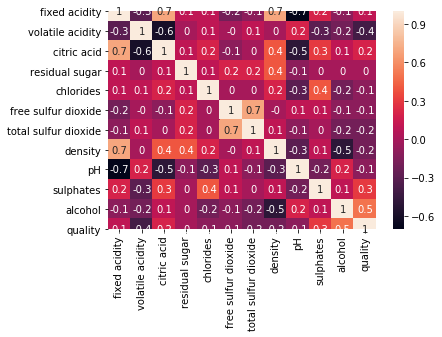

In [52]:
#We can visualize this correlation matrix
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

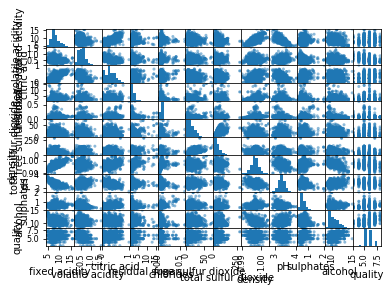

In [66]:
#Another visualization of how each of attribute affect others
from pandas.plotting import scatter_matrix
scatter_matrix(wine_df)
plt.show()

3) VISUALIZATION OF DATASET

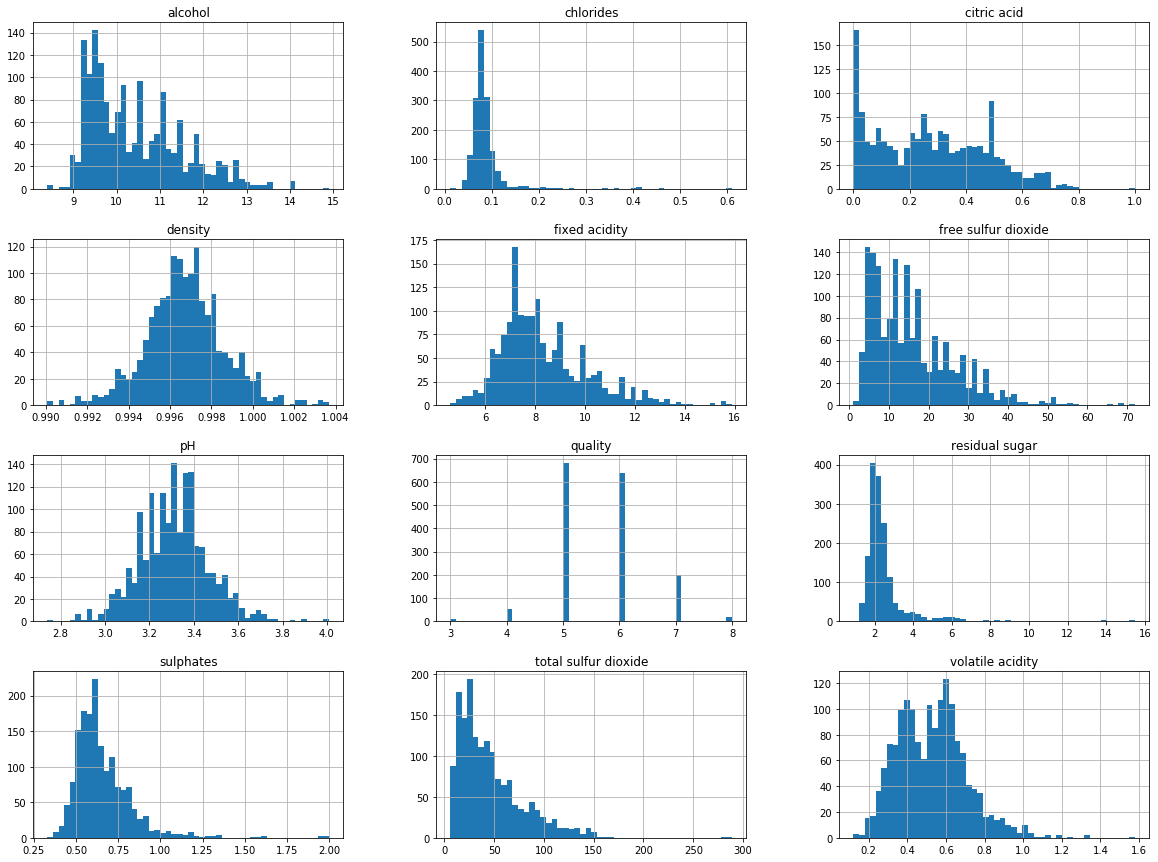

In [54]:
#Histogram of each attribute
import matplotlib.pyplot as plt
wine_df.hist(bins=50, figsize=(20, 15))
plt.show()

According to those histograms, we can see attributes: chlorides, density, residual sulphates and target column(quality) have a quite normal distribution

However, more importantly, the regconition of some attribute has null ('0') values, which is impossible in term of wine indexes and might affect the analysis in future, such as: Acid Citric. So we have to processed those data for better understanding

# II) DATA CLEANING AND TRANSFORMATION

1) DEALING WITH NULL VALUES

The technique I use here is replacing them with their median value

Our dealing target is Acid Citric

In [91]:
# Calculate the median value for Acid Citric
median_ac = wine_df['citric acid'].median()
# Substitute it in the Acid Citric column of the dataset where values are 0
wine_df['citric acid'] = wine_df['citric acid'].replace(
    to_replace=0, value=median_ac)

We check this acid citric graph again

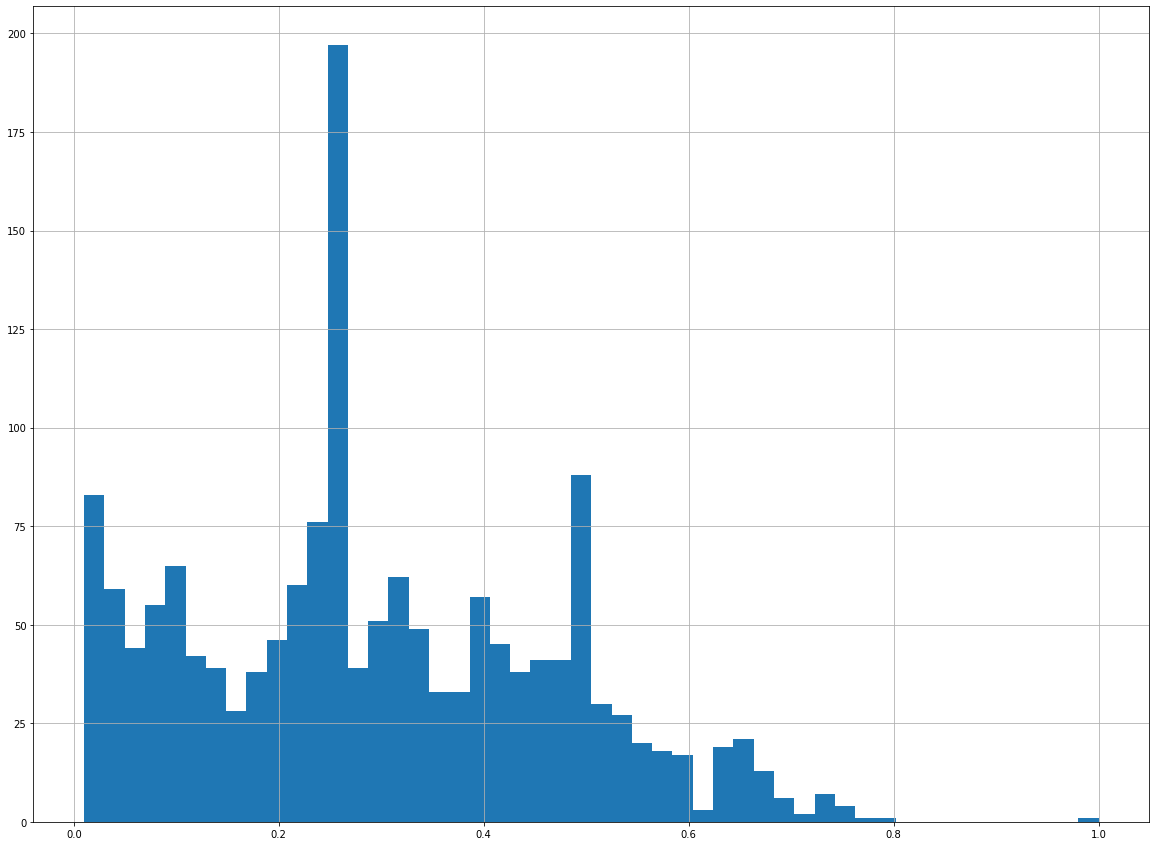

In [59]:
wine_df['citric acid'].hist(bins=50, figsize=(20, 15))
plt.show()

Here all the '0' have been replaced

2) DEALING WITH OUTLIERS

The technique I use here is removing them all from the dataset as they might have negative impact on my classification model

The below codes follow this logic:

a) For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation. 

b) It takes the absolute of Z-score because the direction does not matter, only if it is below the threshold. (here my target is extreme outliers - which are further more than 3 sd from mean value)

c) All(axis=1) ensures that for each row, all column satisfy the constraint. 

d) Change the dataframe based on the result

In [92]:
from scipy import stats
wine_df=wine_df[(np.abs(stats.zscore(wine_df)) < 3).all(axis=1)]

In [93]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.26,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.26,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.26,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


As the result, there are  148 datapoints that do not meet standards and are removed from the  dataset (9.3% reduction)

3) FEATURE SCALING

Look back to the statistical description of dataframe

In [94]:
wine_stats=wine_df.describe().round(decimals=2)
wine_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00
mean,8.31,0.52,0.29,2.39,0.08,15.10,43.74,1.00,3.32,0.64,10.42,5.66
std,1.65,0.17,0.17,0.86,0.02,9.31,29.44,0.00,0.14,0.13,1.02,0.78
min,5.00,0.12,0.01,1.20,0.04,1.00,6.00,0.99,2.88,0.33,8.50,4.00
25%,7.10,0.39,0.14,1.90,0.07,7.00,21.00,1.00,3.22,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,13.00,36.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.63,0.42,2.60,0.09,21.00,58.00,1.00,3.40,0.72,11.10,6.00
max,13.50,1.04,0.79,6.70,0.23,47.00,145.00,1.00,3.75,1.16,13.60,8.00


It's obvious that whereas some features have highly larger than '1.0' range as: fixed acidity(7.5), free sulfur dioxide(46)... others are just ranging from 0 to 1. This difference might affect classification depends on distance such as KNeighbor. Moreover, some learning algorithms don't work very well if the features have a different set of values. For this reason we need to apply a proper scaling system.

The scaling system I choose here is Standardization

In [101]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler(feature_range=(-1,1))
scaler.fit(wine_df.iloc[:,:11])
wine_scaled = scaler.transform(wine_df.iloc[:,:11])

In [109]:
#Scaled values become a 2D array
wine_scaled

array([[-0.43529412,  0.26086957, -0.35897436, ...,  0.44827586,
        -0.44578313, -0.64705882],
       [-0.34117647,  0.65217391, -0.35897436, ..., -0.26436782,
        -0.15662651, -0.49019608],
       [-0.34117647,  0.39130435, -0.92307692, ..., -0.12643678,
        -0.22891566, -0.49019608],
       ...,
       [-0.69411765, -0.15217391, -0.69230769, ...,  0.24137931,
         0.01204819, -0.01960784],
       [-0.78823529,  0.14130435, -0.71794872, ...,  0.5862069 ,
        -0.08433735, -0.33333333],
       [-0.76470588, -0.58695652,  0.17948718, ...,  0.17241379,
        -0.20481928, -0.01960784]])

In [111]:
#Return this 2D array back to dataframe, however the 'quality' column is removed
wine_scaled_df = pd.DataFrame(wine_scaled)

In [112]:
#Add the target column(quality)
wine_scaled_df['11']=wine_df['quality']

In [113]:
#Return the original names of these columns
wine_scaled_df.columns=wine_df.columns

In [114]:
#DataFrame showing
wine_scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.435294,0.260870,-0.358974,-0.745455,-0.595745,-0.565217,-0.597122,0.177570,0.448276,-0.445783,-0.647059,5.0
1,-0.341176,0.652174,-0.358974,-0.490909,-0.361702,0.043478,-0.122302,-0.009346,-0.264368,-0.156627,-0.490196,5.0
2,-0.341176,0.391304,-0.923077,-0.600000,-0.425532,-0.391304,-0.309353,0.028037,-0.126437,-0.228916,-0.490196,5.0
3,0.458824,-0.652174,0.410256,-0.745455,-0.606383,-0.304348,-0.223022,0.214953,-0.356322,-0.397590,-0.490196,6.0
4,-0.435294,0.260870,-0.358974,-0.745455,-0.595745,-0.565217,-0.597122,0.177570,0.448276,-0.445783,-0.647059,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,-0.717647,0.043478,-0.820513,-0.709091,-0.446809,0.347826,-0.453237,-0.364486,0.310345,-0.397590,-0.215686,5.0
1447,-0.788235,-0.065217,-0.769231,-0.636364,-0.744681,0.652174,-0.352518,-0.323364,0.471264,0.036145,0.058824,5.0
1448,-0.694118,-0.152174,-0.692308,-0.600000,-0.595745,0.217391,-0.510791,-0.207477,0.241379,0.012048,-0.019608,5.0
1449,-0.788235,0.141304,-0.717949,-0.709091,-0.606383,0.347826,-0.453237,-0.257944,0.586207,-0.084337,-0.333333,8.0


As we can see now all the attributes (except the target column) are standardized (ranging from -1 to 1)

# III) TESTING MULTIPLE MODELS

1) SPLITTING THE DATASET INTO TRAIN AND TEST SET

In this case, I want to split the it into to train and test set with ratio 0.75 : 0.25, respectively

In [146]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(wine_scaled,wine_df.quality,test_size=0.25,random_state=5)

2) BUILDING AND TESTING MODELS

Right now, we didnot know which model is the best for our classification, I train and test each of them

To avoid overfitting, I split the dataset into many different folds for training and testing

In [141]:
#Import all the learning algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [142]:
#Import some utilities of sklearn to compare algorithms
from sklearn import  model_selection
from sklearn.metrics import classification_report #Reporting metric
from sklearn.metrics import confusion_matrix #Confusion_matrix Reporting
from sklearn.metrics import accuracy_score #Accuracy calculating

In [143]:
# Prepare the configuration to run the test
results=[]
names=[]
seed=7

In [149]:
# Prepare an array with all the algorithms
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('LSVC',LinearSVC()))
models.append(('RFC',RandomForestClassifier()))

In [150]:
#Evaluate each model in turn
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.600195(0.042799)
CARD:0.588184(0.047019)
DTR:0.587266(0.041731)
KNN:0.559735(0.046448)
LDA:0.590078(0.041825)
NB:0.570821(0.038232)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM:0.572630(0.048409)
LSVC:0.591004(0.044699)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFC:0.662666(0.045305)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


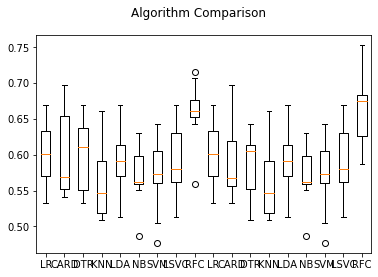

In [151]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like that using this comparison method, the most performant algorithm is RFC

# IV) BUILDING THE BEST MODEL FOR PREDICTION

1) FINDING THE BEST PARAMETER FOR RFC

In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini','entropy'],
    'n_estimators':[10,50,100]
}

model_rfc = RandomForestClassifier()

grid_search = GridSearchCV(
    model_rfc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

The parameter above is the best parameter for RandomForestClassifier model, I will use it the build the model

In [159]:
# Print the bext score found
grid_search.best_score_

0.6911764705882353

2) APPLY THE BEST PARAMETERS TO THE MODEL AND TRAIN IT

In [160]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
rfc = grid_search.best_estimator_

In [161]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test, axis=0)

In [163]:
# Train the model
rfc.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
wine_df.describe().round(decimals=2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00
mean,8.31,0.52,0.29,2.39,0.08,15.10,43.74,1.00,3.32,0.64,10.42,5.66
std,1.65,0.17,0.17,0.86,0.02,9.31,29.44,0.00,0.14,0.13,1.02,0.78
min,5.00,0.12,0.01,1.20,0.04,1.00,6.00,0.99,2.88,0.33,8.50,4.00
25%,7.10,0.39,0.14,1.90,0.07,7.00,21.00,1.00,3.22,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,13.00,36.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.63,0.42,2.60,0.09,21.00,58.00,1.00,3.40,0.72,11.10,6.00
max,13.50,1.04,0.79,6.70,0.23,47.00,145.00,1.00,3.75,1.16,13.60,8.00


# V) MAKE PREDICTIONS

In [169]:
# We create a new (fake) wine infomation
new_wine = pd.DataFrame([[8.0, 0.6, 0.3, 5, 18, 30, 65,1,3,0.8,12]])
# We scale those values like the others
new_wine_scaled = scaler.transform(new_wine)

In [170]:
# We predict the outcome
prediction = rfc.predict(new_wine_scaled)

In [171]:
# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([6], dtype=int64)

Prediction points out that this red wine will score 6.0 in quality

# VI) CONCLUSION

We finally find a score of 69.1% using RFC algorithm and parameters optimisation. Please note that there may be still space for further analysis and optimisation, for example trying different data transformations or trying algorithms that haven't been tested yet. Once again I want to repeat that training a machine learning model to solve a problem with a specific dataset is a try / fail / improve process.

# ACKNOWLEDGEMENT

During project, there are a lot of things I were not clear about or having trouble dealing with machine learning techniques. Therefore, I want to express a huge gratefulness to listed but not limited sources that contribute to this success:

1) https://stackoverflow.com/

2) https://www.datacamp.com

As well as many discussion forums, topics,... that give us a helping hand when encoutering many difficulties during this study.